# SINGAPORE HDB RESALE PRICES [2017-2020]

## <font color='#1CA9C9'> Data Analysis of trends in HDB prices across different locations in Singapore. </font>
<hr>

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
df = pd.read_csv("data/hdb_resales.csv")

In [6]:
df.shape

(80164, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80164 entries, 0 to 80163
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   month                   80164 non-null  object 
 1   town                    80164 non-null  object 
 2   flat_type               80164 non-null  object 
 3   block                   80164 non-null  object 
 4   street_name             80164 non-null  object 
 5   storey_range            80164 non-null  object 
 6   storey_height           80164 non-null  object 
 7   floor_area_sqm          80164 non-null  float64
 8   floor_area_range        80164 non-null  object 
 9   flat_model              80164 non-null  object 
 10  lease_commence_date     80164 non-null  int64  
 11  remaining_lease         80164 non-null  object 
 12  remaining_years_months  80164 non-null  int64  
 13  remaining_months        80164 non-null  object 
 14  remaining_months_value  80164 non-null

In [8]:
df.head()

,month,town,flat_type,block,street_name,storey_range,storey_height,floor_area_sqm,floor_area_range,flat_model,lease_commence_date,remaining_lease,remaining_years_months,remaining_months,remaining_months_value,total_remaining_months,total_leasehold,percent_lease_left,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,mid-high floor,44.0,50,Improved,1979,61 years 04 months,732,4,4,736,99,0.62,232000
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,low floor,67.0,50-100,New Generation,1978,60 years 07 months,720,7,7,727,99,0.61,250000
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,low floor,67.0,50-100,New Generation,1980,62 years 05 months,744,5,5,749,99,0.63,262000
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,low floor,68.0,50-100,New Generation,1980,62 years 01 month,744,1,1,745,99,0.63,265000
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,low floor,67.0,50-100,New Generation,1980,62 years 05 months,744,5,5,749,99,0.63,265000


In [9]:
df.describe()

,floor_area_sqm,lease_commence_date,remaining_years_months,remaining_months_value,total_remaining_months,total_leasehold,percent_lease_left,resale_price
count,80164.000000,80164.000000,80164.000000,80164.000000,80164.000000,80164.000000,80164.000000,8.016400e+04
mean,97.620421,1994.110823,890.775161,5.548027,896.323187,98.545132,0.757953,4.392953e+05
std,24.298659,12.836369,153.728074,3.456553,153.698478,0.500461,0.129524,1.535513e+05
min,31.000000,1966.000000,540.000000,0.000000,544.000000,98.000000,0.460000,1.400000e+05
25%,82.000000,1984.000000,768.000000,3.000000,778.000000,98.000000,0.660000,3.300000e+05
50%,95.000000,1994.000000,888.000000,6.000000,896.000000,99.000000,0.760000,4.088880e+05
75%,113.000000,2003.000000,996.000000,9.000000,1007.000000,99.000000,0.850000,5.150000e+05
max,249.000000,2019.000000,1164.000000,11.000000,1173.000000,100.000000,1.000000,1.258000e+06


### <h2> <font color='#1CA9C9'> Data Cleaning and Structuring </font> </h2>
<hr>

In [11]:
# changing the data type for the date column types
df["month"] = pd.to_datetime(df["month"])
df["lease_commence_date"] = pd.to_datetime(df["lease_commence_date"])

In [12]:
# remove extra columns that are not needed
df.drop('remaining_years_months', axis='columns', inplace=True)
df.drop('remaining_months_value', axis='columns', inplace=True)
df.drop('total_remaining_months', axis='columns', inplace=True)

In [49]:
df.drop('remaining_months', axis='columns', inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80164 entries, 0 to 80163
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   month                80164 non-null  datetime64[ns]
 1   town                 80164 non-null  object        
 2   flat_type            80164 non-null  object        
 3   block                80164 non-null  object        
 4   street_name          80164 non-null  object        
 5   storey_range         80164 non-null  object        
 6   storey_height        80164 non-null  object        
 7   floor_area_sqm       80164 non-null  float64       
 8   floor_area_range     80164 non-null  object        
 9   flat_model           80164 non-null  object        
 10  lease_commence_date  80164 non-null  datetime64[ns]
 11  remaining_lease      80164 non-null  object        
 12  total_leasehold      80164 non-null  int64         
 13  percent_lease_left   80164 non-

In [53]:
# Making sure there are no null values in the dataset
pd.isnull(df).sum()
# pd.dropna()
# pd.fillna(0)

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
storey_height          0
floor_area_sqm         0
floor_area_range       0
flat_model             0
lease_commence_date    0
remaining_lease        0
total_leasehold        0
percent_lease_left     0
resale_price           0
dtype: int64

In [58]:
# remove any duplicates
df.duplicated()
# df.drop_duplicates()

0        False
1        False
2        False
3        False
4        False
         ...  
80159    False
80160    False
80161    False
80162    False
80163    False
Length: 80164, dtype: bool

In [60]:
df.head()

,month,town,flat_type,block,street_name,storey_range,storey_height,floor_area_sqm,floor_area_range,flat_model,lease_commence_date,remaining_lease,total_leasehold,percent_lease_left,resale_price
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,mid-high floor,44.0,50,Improved,1970-01-01 00:00:00.000001979,61 years 04 months,99,0.62,232000
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,low floor,67.0,50-100,New Generation,1970-01-01 00:00:00.000001978,60 years 07 months,99,0.61,250000
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,low floor,67.0,50-100,New Generation,1970-01-01 00:00:00.000001980,62 years 05 months,99,0.63,262000
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,low floor,68.0,50-100,New Generation,1970-01-01 00:00:00.000001980,62 years 01 month,99,0.63,265000
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,low floor,67.0,50-100,New Generation,1970-01-01 00:00:00.000001980,62 years 05 months,99,0.63,265000


### <h2> <font color='#1CA9C9'> Data Visualization </font> </h2>
<hr>

#### <u> <b> Question 1: What is the trend of resale prices over time? </u>
Here are some answers we are looking for - </b>
-  How successful were HDB resales over 2017-2020?
-  How expensive were HDB resale rates over 2017-2020?

In [185]:
# the volume of sales can be tabulated using the sum of sales over the years
sum_table = pd.pivot_table(df, values='resale_price', index=['month'], aggfunc="sum")
sum_table.head()

,resale_price
month,
2017-01-01,502596777
2017-02-01,483079627
2017-03-01,840325894
2017-04-01,798605232
2017-05-01,870023650


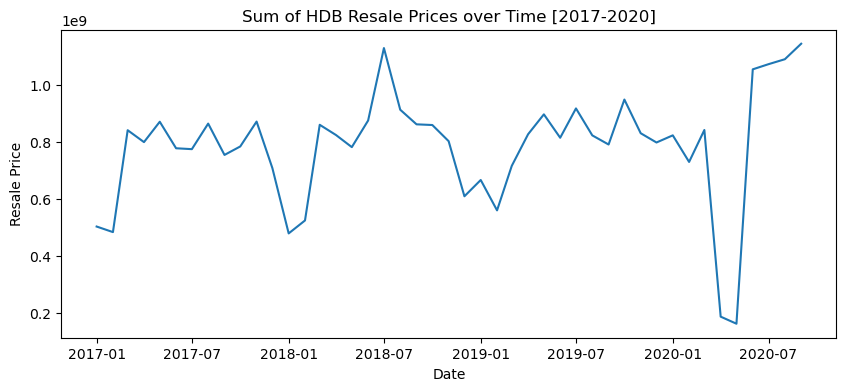

In [167]:
sum_dates = sum_table.index
sum_resale_prices = sum_table['resale_price']

plt.figure(figsize=(10,4))
plt.xlabel('Date')
plt.ylabel('Resale Price')
plt.title('Sum of HDB Resale Prices over Time [2017-2020]')

plt.plot(sum_dates, sum_resale_prices)
plt.show()

In [183]:
# the price of units can be tabulated using the avg sale price over the years
avg_table = pd.pivot_table(df, values='resale_price', index=['month'], aggfunc="mean")
avg_table.head()

,resale_price
month,
2017-01-01,427378.211735
2017-02-01,447295.950926
2017-03-01,444852.246691
2017-04-01,438553.120264
2017-05-01,443663.258542


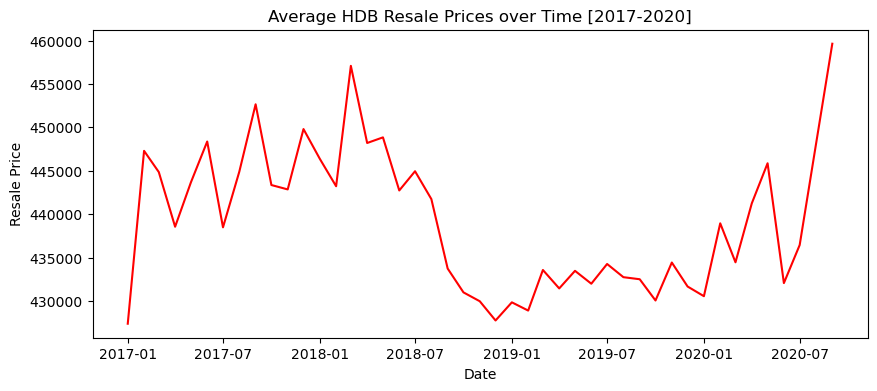

In [169]:
avg_dates = avg_table.index
avg_resale_prices = avg_table['resale_price']

plt.figure(figsize=(10,4))
plt.xlabel('Date')
plt.ylabel('Resale Price')
plt.title('Average HDB Resale Prices over Time [2017-2020]')

plt.plot(avg_dates, avg_resale_prices, color="red")
plt.show()


#### <b> <u> Question 2: What is the trend of resale prices over time based on locations? </u>
Here are some answers we are looking for - </b>
-  How successful were HDB resales in location XYZ over 2017-2020?
-  How expensive were HDB resale rates  in location XYZ over 2017-2020?

In [201]:
# the volume of sales can be tabulated using the sum of sales over the years
sum_table = pd.pivot_table(df, values='resale_price', index=['month'], columns=['town'], aggfunc="sum")
sum_table.head()

town,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL AREA,CHOA CHU KANG,CLEMENTI,...,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN
month,,,,,,,,,,,,,,,,,,,,,
2017-01-01,23182388.0,28601888.0,13307628.0,17552188.0,28217000.0,18375800.0,2436888.0,6665000.0,17266688.0,11782800.0,...,16867888.0,25373452.0,13422688.0,9431000.0,33827664.0,9329000.0,36871364.0,14719888.0,32394463.0,26062328.0
2017-02-01,16342776.0,28092876.0,23576164.0,9955888.0,22465664.0,11752000.0,3645000.0,6396000.0,17866876.0,10241500.0,...,14825000.0,26709540.0,10933000.0,12875775.0,36176904.0,14364056.0,34051776.0,20276376.0,29122164.0,31714564.0
2017-03-01,38772764.0,41519052.0,24081888.0,28124552.0,36285940.0,20050896.0,3406000.0,16496000.0,27806052.0,22649688.0,...,38478888.0,54890957.0,33415688.0,18879764.0,63213064.0,24983376.0,54544688.0,32515051.0,50812428.0,40302752.0
2017-04-01,36288552.0,43025051.0,22441688.0,25774964.0,38767177.0,28164516.0,3993888.0,12571999.0,25398088.0,22125752.0,...,29143964.0,45760096.0,24637400.0,18600688.0,56278828.0,18863452.0,58352139.0,16825264.0,53628740.0,41886128.0
2017-05-01,41297888.0,41206628.0,29088000.0,25788408.0,48887176.0,35000921.0,2620000.0,9666000.0,26083164.0,23804488.0,...,29052376.0,45960092.0,28212888.0,23207600.0,64921242.0,15398388.0,64169719.0,27943988.0,58533328.0,47657852.0
